### Comparison of Select Medicare Measures of Mortality in US Hospitals 

#### Capstone Project 1 for Data Science
Kathleen King

With recent publication of US News & World Report’s 2019-2020 Best Hospitals Honor Roll, it is clear that many factors are considered in rating a hospital for excellence of care. In order to receive a spot on the Hospital Honor Roll, a hospital must demonstrate successful treatment of patients along multiple specialty lines. (Source: https://health.usnews.com/health-care/best-hospitals/articles/best-hospitals-honor-roll-and-overview) In contrast, the Centers for Medicare & Medicaid Services (CMS) ratings reflect a hospital’s performance on more common conditions and provide a system to compare a hospital’s performance to other hospitals in the US. (Source:  https://www.medicare.gov/hospitalcompare/About/Hospital-overall-ratings.html)

#### The Data

Hospitals collect data on some 57 different measures, including mortality, complications, infection rates, safety, and staffing, and report their data to CMS. The data explored for this Capstone Project are a portion of the data used by CMS to calculate these hospital ratings. Multiple datasets are available for public use from Medicare.gov. The dataset chosen for this report is one of the “Hospital Compare” datasets focused on “Deaths and Complications.” This report will look at the measures that deal with mortality, and specifically at one measure across the nation and individual states.

data source: https://data.medicare.gov/Hospital-Compare/Complications-and-Deaths-Hospital/ynj2-r877

The “Deaths and Complications” dataset is comprised of 19 Measures, seven of which are related to mortality. In addition to the Name and location information for each hospital (including State), and the name and ID for the Measure being evaluated, the data contains values for Denominator, Score, and a Lower and Higher Estimate of the score. 

It was not immediately clear what the values of Denominator and Score represented or how they were calculated. Information was provided from the Hospital Compare Support Contractor which indicated that the Denominator represented the “at risk” population for the Measure within each hospital, and the Score represented the numerator or number of patients who had the Measure. The score may have been risk-adjusted, but no further information was available on which measures had been adjusted. 

Examining all the data provided was beyond the scope of this project. Initially the seven Measures of mortality were selected for examination.  The summary statistics for the mortality Measures, as follows, describe the Score for each measure across all hospitals (range 1005 - 4139). In order to take a closer look at the data, we will examine one of the Measures across the nation and the 55 US States and territories.

##### Import, review, and clean-up data

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\medicare_Complications_Deaths_Hospital_copy.csv')

In [315]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different Than the National Rate,292,3.2,2.1,4.8,NaN,4/1/2015,3/31/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688,13,11,15.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG surgery patients,MORT_30_CABG,No Different Than the National Rate,291,4.3,2.6,6.8,NaN,7/1/2015,6/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for COPD patients,MORT_30_COPD,No Different Than the National Rate,411,8.8,6.7,11.4,NaN,7/1/2015,6/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart failure patients,MORT_30_HF,No Different Than the National Rate,869,12.7,10.7,15,NaN,7/1/2015,6/30/2018


In [316]:
df.columns.values

array(['Provider ID', 'Hospital Name', 'Address', 'City', 'State',
       'ZIP Code', 'County Name', 'Phone Number', 'Measure Name',
       'Measure ID', 'Compared to National', 'Denominator', 'Score',
       'Lower Estimate', 'Higher Estimate', 'Footnote',
       'Measure Start Date', 'Measure End Date'], dtype=object)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91889 entries, 0 to 91888
Data columns (total 18 columns):
Provider ID             91889 non-null object
Hospital Name           91889 non-null object
Address                 91889 non-null object
City                    91889 non-null object
State                   91889 non-null object
ZIP Code                91889 non-null int64
County Name             91889 non-null object
Phone Number            91889 non-null int64
Measure Name            91889 non-null object
Measure ID              91889 non-null object
Compared to National    91889 non-null object
Denominator             91889 non-null object
Score                   91889 non-null object
Lower Estimate          91889 non-null object
Higher Estimate         91889 non-null object
Footnote                37628 non-null object
Measure Start Date      91889 non-null object
Measure End Date        91889 non-null object
dtypes: int64(2), object(16)
memory usage: 12.6+ MB


The dataset contains 91,889 entries across 18 columns. A review of the data types contained in each column reveals that the Score and Denominator are non-null objects, which are not appropriate for statistical analysis. 
* The first task is to convert the non-null objects to floats. 

In [318]:
df['Score'] = pd.to_numeric(df.Score, errors = 'coerce', downcast = 'float')

In [319]:
df['Denominator'] = pd.to_numeric(df.Denominator, errors = 'coerce', downcast = 'float')

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91889 entries, 0 to 91888
Data columns (total 18 columns):
Provider ID             91889 non-null object
Hospital Name           91889 non-null object
Address                 91889 non-null object
City                    91889 non-null object
State                   91889 non-null object
ZIP Code                91889 non-null int64
County Name             91889 non-null object
Phone Number            91889 non-null int64
Measure Name            91889 non-null object
Measure ID              91889 non-null object
Compared to National    91889 non-null object
Denominator             51106 non-null float32
Score                   54316 non-null float32
Lower Estimate          91889 non-null object
Higher Estimate         91889 non-null object
Footnote                37628 non-null object
Measure Start Date      91889 non-null object
Measure End Date        91889 non-null object
dtypes: float32(2), int64(2), object(14)
memory usage: 11.9+ MB

* The next task is to eliminate all the incomplete rows. 
Once that task is completed, the dataset is reduced to 54,316 entries (rows). 

In [321]:
#inplace = True necessary to keep the rows that have Score values
df.dropna(subset =['Score'], inplace = True)

In [322]:
df.shape

(54316, 18)

A quick review of the first several rows compared to the original CSV dataset confirms that the incomplete rows have been deleted, leaving only rows with values for Score. 

In [323]:
df.head(27)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different Than the National Rate,292.0,3.200000,2.1,4.8,NaN,4/1/2015,3/31/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688.0,13.000000,11,15.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG surgery patients,MORT_30_CABG,No Different Than the National Rate,291.0,4.300000,2.6,6.8,NaN,7/1/2015,6/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for COPD patients,MORT_30_COPD,No Different Than the National Rate,411.0,8.800000,6.7,11.4,NaN,7/1/2015,6/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart failure patients,MORT_30_HF,No Different Than the National Rate,869.0,12.700000,10.7,15,NaN,7/1/2015,6/30/2018
5,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for pneumonia patients,MORT_30_PN,No Different Than the National Rate,560.0,17.000000,14.4,20,NaN,7/1/2015,6/30/2018
6,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for stroke patients,MORT_30_STK,No Different Than the National Rate,617.0,14.100000,11.8,16.8,NaN,7/1/2015,6/30/2018
7,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Postoperative Acute Kidney Injury Requiring Di...,PSI_10_POST_KIDNEY,No Different Than the National Rate,1681.0,0.740000,0,1.73,NaN,7/1/2016,6/30/2018
8,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Postoperative Respiratory Failure Rate,PSI_11_POST_RESP,No Different Than the National Rate,1196.0,8.660000,4.4,12.92,NaN,7/1/2016,6/30/2018
9,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different Than the National Rate,4076.0,4.730000,3.1,6.36,NaN,7/1/2016,6/30/2018


###### Create sub-dataframe to compare only mortality measures
Select the following from 'Measure ID' for comparison: 
MORT_30_AMI, MORT_30_CABG, MORT_30_COPD, MORT_30_HF, MORT_30_PN, MORT_30_STK, PSI_4_SURG_COMP

In [324]:
array = ['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP']
df_mortality = df.loc[df['Measure ID'].isin(array)]

In [366]:
df_mortality.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688.0,13.0,11,15.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG surgery patients,MORT_30_CABG,No Different Than the National Rate,291.0,4.3,2.6,6.8,NaN,7/1/2015,6/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for COPD patients,MORT_30_COPD,No Different Than the National Rate,411.0,8.8,6.7,11.4,NaN,7/1/2015,6/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart failure patients,MORT_30_HF,No Different Than the National Rate,869.0,12.7,10.7,15,NaN,7/1/2015,6/30/2018
5,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for pneumonia patients,MORT_30_PN,No Different Than the National Rate,560.0,17.0,14.4,20,NaN,7/1/2015,6/30/2018


In [326]:
df_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 1 to 91827
Data columns (total 18 columns):
Provider ID             18955 non-null object
Hospital Name           18955 non-null object
Address                 18955 non-null object
City                    18955 non-null object
State                   18955 non-null object
ZIP Code                18955 non-null int64
County Name             18955 non-null object
Phone Number            18955 non-null int64
Measure Name            18955 non-null object
Measure ID              18955 non-null object
Compared to National    18955 non-null object
Denominator             18955 non-null float32
Score                   18955 non-null float32
Lower Estimate          18955 non-null object
Higher Estimate         18955 non-null object
Footnote                20 non-null object
Measure Start Date      18955 non-null object
Measure End Date        18955 non-null object
dtypes: float32(2), int64(2), object(14)
memory usage: 2.6+ MB


The dataframe has been reduced to 18,955 entries (rows). 
Review the summary statistics of this dataframe. 

In [327]:
df_mortality.groupby('Measure ID')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Measure ID,,,,,,,,
MORT_30_AMI,2359.0,12.809790,1.110250,8.800000,12.100000,12.800000,13.500000,17.200001
MORT_30_CABG,1005.0,3.135025,0.855779,1.200000,2.600000,3.000000,3.500000,7.300000
MORT_30_COPD,3538.0,8.535918,1.107677,4.900000,7.800000,8.400000,9.200000,14.300000
MORT_30_HF,3617.0,11.562374,1.717860,5.500000,10.400000,11.500000,12.600000,18.799999
MORT_30_PN,4139.0,15.697646,2.102354,8.100000,14.300000,15.600000,17.000000,25.799999
MORT_30_STK,2511.0,13.840305,1.480812,8.900000,12.800000,13.700000,14.700000,21.400000
PSI_4_SURG_COMP,1786.0,162.931900,19.382231,91.709999,150.045002,162.034996,174.400002,242.869995


#### The Questions

Proposed questions:

1. Which states have the "best" hospitals as defined by lowest rate of mortality for the Measure of Pneumonia (PN)? Rank states in order of overall best to worst.

2. How do each state's hospitals compare to other states? Which states rank above or below the national average? 

3. Does the difference in the mean for this individual Measure have any significance? What factors may influence a state’s ranking in this measure? 



##### Question 1
1. Which states have the "best" hospitals as defined by lowest rate of mortality for the Measure of Pneumonia (PN)? Rank states in order of overall best to worst.

The first step in our analysis of the data was to look at the Measures for mortality (7). The distributions of each Measure from the Summary Statistics indicate normal distributions for each measure. 

###### Creating plots to show national mean of Score for each Measure ID.
Method: creating sub-df for each of 7 Measure IDs. 

In [329]:
df_ami = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_AMI'])])

In [378]:
df_ami.shape

(2359, 18)

In [333]:
df_cabg = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_CABG'])])

In [379]:
df_cabg.shape

(1005, 18)

In [334]:
df_copd = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_COPD'])])

In [380]:
df_copd.shape

(3538, 18)

In [335]:
df_hf = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_HF'])])

In [383]:
df_hf.shape

(3617, 18)

In [367]:
df_pn = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_PN'])])

In [377]:
df_pn.shape

(4139, 18)

In [337]:
df_stk = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['MORT_30_STK'])])

In [381]:
df_stk.shape

(2511, 18)

In [338]:
df_comp = df_mortality.apply(lambda row: row[df_mortality['Measure ID'].isin(['PSI_4_SURG_COMP'])])

In [384]:
df_comp.shape

(1786, 18)

<Figure size 432x288 with 0 Axes>

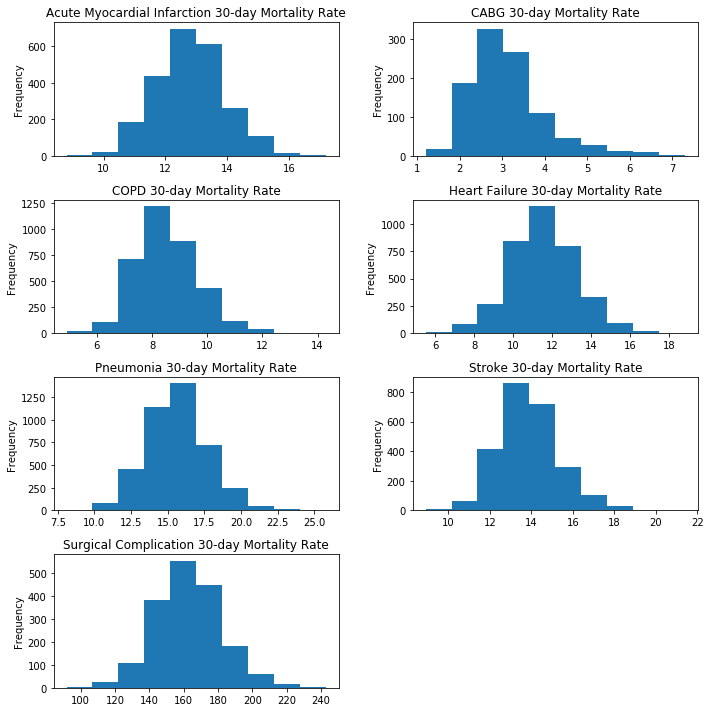

In [362]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))


ax1 = plt.subplot(4, 2, 1)
df_ami.plot(ax  = ax1, kind = 'hist', y = 'Score', title = 'Acute Myocardial Infarction 30-day Mortality Rate', legend = None)

ax2 = plt.subplot(4, 2, 2)
df_cabg.plot(ax  = ax2, kind = 'hist', y = 'Score', title = 'CABG 30-day Mortality Rate', legend = None)

ax3 = plt.subplot(4, 2, 3)
df_copd.plot(ax  = ax3, kind = 'hist', y = 'Score',  title = 'COPD 30-day Mortality Rate', legend = None)

ax4 = plt.subplot(4, 2, 4)
df_hf.plot(ax  = ax4, kind = 'hist', y = 'Score',  title = 'Heart Failure 30-day Mortality Rate', legend = None)

ax5 = plt.subplot(4, 2, 5)
df_pn.plot(ax  = ax5, kind = 'hist', y = 'Score',  title = 'Pneumonia 30-day Mortality Rate', legend = None)

ax6 = plt.subplot(4, 2, 6)
df_stk.plot(ax  = ax6, kind = 'hist', y = 'Score',  title = 'Stroke 30-day Mortality Rate', legend = None)

ax7 = plt.subplot(4, 2, 7)
df_comp.plot(ax  = ax7, kind = 'hist', y = 'Score',  title = 'Surgical Complication 30-day Mortality Rate', legend = None)

#eliminate empty subplot
ax8 = plt.subplot(4,2,8)
ax8.set_axis_off()

plt.tight_layout()
plt.show()

In [328]:
#same as above
df_mortality['Score'].groupby(df_mortality['Measure ID']).describe()

,count,mean,std,min,25%,50%,75%,max
Measure ID,,,,,,,,
MORT_30_AMI,2359.0,12.809790,1.110250,8.800000,12.100000,12.800000,13.500000,17.200001
MORT_30_CABG,1005.0,3.135025,0.855779,1.200000,2.600000,3.000000,3.500000,7.300000
MORT_30_COPD,3538.0,8.535918,1.107677,4.900000,7.800000,8.400000,9.200000,14.300000
MORT_30_HF,3617.0,11.562374,1.717860,5.500000,10.400000,11.500000,12.600000,18.799999
MORT_30_PN,4139.0,15.697646,2.102354,8.100000,14.300000,15.600000,17.000000,25.799999
MORT_30_STK,2511.0,13.840305,1.480812,8.900000,12.800000,13.700000,14.700000,21.400000
PSI_4_SURG_COMP,1786.0,162.931900,19.382231,91.709999,150.045002,162.034996,174.400002,242.869995


In [369]:
#double check that the sub-dfs are computing the same mean as the df_mortality 
df_pn['Score'].mean()

15.697646141052246

##### Question 1, continued
In order to conduct a deeper analysis, one of the seven Measures was chosen. The mortality rate due to pneumonia was eventually selected due to the fact that it has the largest population of the seven. The state ranking of hospitals for the PN Measure are as follows: 

In [407]:
dfpn_state = df_pn.groupby('State')['Score']

In [412]:
#Summary Statistics for PN Measure by State
dfpn_state = df_pn.groupby('State')['Score'].describe()
dfpn_state.head()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
AK,14.0,15.742859,1.200458,13.8,14.95,15.450000,16.875,17.500000
AL,83.0,16.424097,2.299130,11.4,14.85,16.299999,17.600,22.400000
AR,73.0,16.469862,1.931082,12.4,15.20,16.299999,18.000,21.700001
AZ,66.0,15.175756,2.028267,10.5,13.70,15.200000,16.600,20.299999
CA,287.0,15.133791,2.459521,8.1,13.70,15.000000,16.500,22.700001


###### Rank States by mean of PN Measure

In [414]:
dfpn_state['Rank'] = dfpn_state['mean'].rank()
dfpn_state.sort_values('mean', inplace = True)
dfpn_state.head(55)

,count,mean,std,min,25%,50%,75%,max,Rank
State,,,,,,,,,
MA,56.0,13.937499,1.843373,9.800000,12.950000,14.150000,15.125000,18.100000,1.0
VT,15.0,14.853333,1.759004,12.400000,13.750000,14.500000,15.500000,19.000000,2.0
MN,89.0,14.857301,1.388990,12.200000,14.100000,14.600000,15.800000,18.200001,3.0
GU,1.0,15.000000,NaN,15.000000,15.000000,15.000000,15.000000,15.000000,4.0
OH,147.0,15.059863,2.134058,10.700000,13.500000,15.000000,16.500000,23.100000,5.0
RI,10.0,15.060000,2.477095,11.500000,13.250000,15.000000,16.275000,18.799999,6.0
CO,67.0,15.110446,1.777054,12.100000,13.950000,15.100000,16.100000,20.500000,7.0
CA,287.0,15.133791,2.459521,8.100000,13.700000,15.000000,16.500000,22.700001,8.0
AZ,66.0,15.175756,2.028267,10.500000,13.700000,15.200000,16.600000,20.299999,9.0


###### Plot State Ranking of PN Measure

<Figure size 432x288 with 0 Axes>

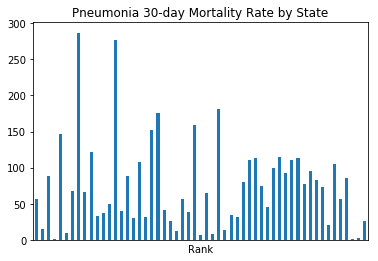

In [374]:
fig = plt.figure()

dfpn_state.plot(kind = 'bar', x = 'Rank', y = 'count', legend = None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title('Pneumonia 30-day Mortality Rate by State')

plt.show()

##### Question 2
2. How do each state's hospitals compare to other states on the PN Mortality Measure? Which states rank above or below the national average? 

###### Plot national PN measure with mean and +/- SD

<Figure size 432x288 with 0 Axes>

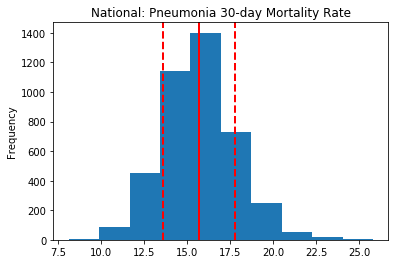

In [391]:
fig = plt.figure()

#xmin = df_pn['Score'].min()
#xmax = df_pn['Score'].max()

df_pn.plot(kind = 'hist', y = 'Score', legend = None)
#plt.xlim(xmin, xmax)

plt.axvline(df_pn['Score'].mean(), color = 'red', linestyle = 'solid', linewidth = 2)

plt.axvline(df_pn['Score'].mean() + df_pn['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)
plt.axvline(df_pn['Score'].mean() - df_pn['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)

plt.title('National: Pneumonia 30-day Mortality Rate')

plt.show()

In [451]:
df_pn['Score'].mean()

15.697646141052246

###### Plot mean of PN measure for each state

<Figure size 432x288 with 0 Axes>

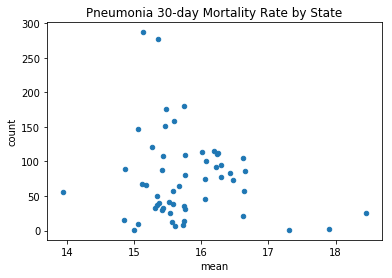

In [389]:
fig = plt.figure()
dfpn_state.plot(kind = 'scatter', x = 'mean', y = 'count', legend = None)

plt.title('Pneumonia 30-day Mortality Rate by State')

plt.show()

###### Overlay national mean for PN Measure with state means

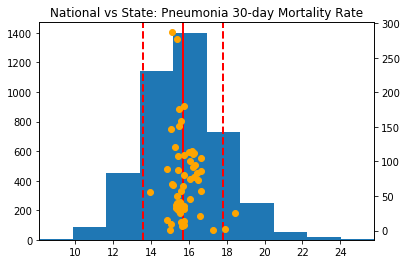

In [395]:
fig, ax1 = plt.subplots()

xmin = df_pn['Score'].min()
xmax = df_pn['Score'].max()

ax1.hist(df_pn["Score"])
plt.xlim(xmin, xmax)
plt.axvline(df_pn['Score'].mean(), color = 'red', linestyle = 'solid', linewidth = 2)
plt.axvline(df_pn['Score'].mean() + df_pn['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)
plt.axvline(df_pn['Score'].mean() - df_pn['Score'].std(), color = 'red', linestyle = 'dashed', linewidth =2)
plt.title('National vs State: Pneumonia 30-day Mortality Rate')
ax2 = ax1.twinx()
ax2.scatter(dfpn_state['mean'], dfpn_state['count'], color='orange')

In [444]:
pn_mean = df_pn['Score'].mean()
pn_mean

15.697646141052246

###### States BELOW the national mean for PN mortality

In [445]:
dfpn_state[dfpn_state['mean'] < pn_mean]

,count,mean,std,min,25%,50%,75%,max,Rank
State,,,,,,,,,
MA,56.0,13.937499,1.843373,9.8,12.950,14.15,15.125000,18.100000,1.0
VT,15.0,14.853333,1.759004,12.4,13.750,14.50,15.500000,19.000000,2.0
MN,89.0,14.857301,1.388990,12.2,14.100,14.60,15.800000,18.200001,3.0
GU,1.0,15.000000,NaN,15.0,15.000,15.00,15.000000,15.000000,4.0
OH,147.0,15.059863,2.134058,10.7,13.500,15.00,16.500000,23.100000,5.0
RI,10.0,15.060000,2.477095,11.5,13.250,15.00,16.275000,18.799999,6.0
CO,67.0,15.110446,1.777054,12.1,13.950,15.10,16.100000,20.500000,7.0
CA,287.0,15.133791,2.459521,8.1,13.700,15.00,16.500000,22.700001,8.0
AZ,66.0,15.175756,2.028267,10.5,13.700,15.20,16.600000,20.299999,9.0


###### States ABOVE the national mean for PN mortality

In [446]:
dfpn_state[dfpn_state['mean'] > pn_mean]

,count,mean,std,min,25%,50%,75%,max,Rank
State,,,,,,,,,
DC,8.0,15.724999,1.973214,12.200000,14.800000,16.000000,16.800001,18.600000,30.0
FL,181.0,15.741982,2.455019,8.600000,14.000000,15.700000,17.400000,23.100000,31.0
AK,14.0,15.742859,1.200458,13.800000,14.950000,15.450000,16.875000,17.500000,32.0
ND,35.0,15.748571,1.855417,11.000000,14.750000,15.800000,16.849999,20.900000,33.0
NV,31.0,15.751613,2.407332,10.300000,14.350000,15.300000,17.350000,21.500000,34.0
VA,80.0,15.758751,1.914085,10.800000,14.775000,15.650000,16.700001,22.100000,35.0
KS,110.0,15.760000,2.140916,11.500000,14.625000,15.600000,16.299999,25.700001,36.0
WI,114.0,16.015793,2.441659,11.900000,14.300000,15.550000,17.275000,25.000000,37.0
NE,75.0,16.051998,1.801828,12.900000,14.700000,16.000000,17.100000,22.100000,38.0


##### Question 3
3. Does the difference in the State's mean for this individual Measure have any significance? What factors may influence a state’s ranking in this measure? 

In [354]:
import scipy
from scipy.stats import ttest_ind

In [441]:
#states with means above national (bottom)
pr = df_pn[df_pn['State'] == 'PR']
ms = df_pn[df_pn['State'] == 'MS']
sc = df_pn[df_pn['State'] == 'SC']
nc = df_pn[df_pn['State'] == 'NC']
wy = df_pn[df_pn['State'] == 'WY']

#states with means below national (top)
ma = df_pn[df_pn['State'] == 'MA']
vt = df_pn[df_pn['State'] == 'VT']
mn = df_pn[df_pn['State'] == 'MN']

#states with means at national average (middle)
ny = df_pn[df_pn['State'] == 'NY']
fl = df_pn[df_pn['State'] == 'FL']

###### t-test used to determine whether differences in State means are significant

In [447]:
#test difference between states at top and bottom
print(ttest_ind(ma['Score'], pr['Score']))

Ttest_indResult(statistic=-10.776978826538878, pvalue=3.0193534553587474e-17)


_very low p-value_ (results indicate significant difference in the means; high confidence that the treatement effect was greater)

In [448]:
#test difference between states at top and bottom
print(ttest_ind(vt['Score'], sc['Score']))

Ttest_indResult(statistic=-3.0392927229942286, pvalue=0.003333105303508724)


_low p-value_ (results indicate a significant difference in the means)

In [449]:
#test difference between states at top and middle
print(ttest_ind(ma['Score'], ny['Score']))

Ttest_indResult(statistic=-5.080191135812545, pvalue=8.226564707919104e-07)


_very low p-value_ (results indicate significant difference in the means; high confidence that the treatement effect was greater)

In [452]:
#test difference between states at top and middle
print(ttest_ind(vt['Score'], fl['Score']))

Ttest_indResult(statistic=-1.3715086821796436, pvalue=0.1718006225425915)


_high p-value_ (results indicate no significant difference in the means) 

In [426]:
#test difference between states at top
print(ttest_ind(ma['Score'], vt['Score']))

Ttest_indResult(statistic=-1.724609502199148, pvalue=0.0890751385014567)


_high p-value_ (results indicate no significant difference in the means) 

In [425]:
#test difference between states at top
print(ttest_ind(ma['Score'], mn['Score']))

Ttest_indResult(statistic=-3.414572718834102, pvalue=0.0008315386661150896)


_low p-value_ (results indicate a significant difference in the means)

The results of the t-test are as expected when comparing the “top” ranked hospitals to “low” ranked hospitals, with p-values well below the widely accepted 0.05 to indicate a significant difference due to intervention rather than chance. The glaring exception to the expected results occurs when the score for the state of Vermont (ranked at the top of the list) is tested against values from the top, the bottom, and the middle of the State rankings.

With only a casual knowledge of the “best” hospitals in the US, it is surprising to find Vermont at the top of the rankings. The use of the Student’s t-test to calculate the p-value for the differences in scores helps to clarify the situation. When tested against both top and middle rankings, the p-value is high (>0.5) indicating the results are not statistically different than the compared state's results. When the Vermont score is tested against the bottom of the ranking list, it does produce a low p-value, but one that is significantly higher than when the other top hospitals are tested against States at the bottom of the list.

One possible explanation for the high p-scores associated with Vermont’s score is the limited number of cases (denominator) used to calculate the mean. Because Vermont had only 15 cases of pneumonia reported, it is likely that their low rate of mortality was influenced more by chance than by the quality of treatment received in the hospitals. 

#### Future Questions

As noted above, the US News & World Report's "Best Hospitals" are decided on criteria that differ from those that CMS uses to rate hospitals. In addition to creating a "Best Hospital" honor roll of nationally renowned hospitals, US News & World Report also publishes a list of "Best Regional Hospitals." According to their report, there are concentrations of "standout regional hospitals" across the country, with  the New York metro area (NY), the Los Angeles metro area (CA), and the Chicago metro area (IL) at the top of the list. It's interesting to note that none of these states appeared at the top of the State ranking list for this project. Keeping this in mind, proposal for further research into this dataset follow below. 

1. Obviously a hospitals ranking is based on multiple measures. For further research, it would be interesting to determin how State's hospitals rank on each of the 19 criteria provided in the original dataset. This would require writing functions to repeat the above methods of review on each of the 19 Measures. Also, in order to make the scores more valid, some weighting of the scores, based on the size of the denominator, would be required. 

2. In addition to further exploration of the above dataset, several related questions regarding factors which may affect the quality of a State's hospitals could be examined. 
    a. Geography: Does the geographical location of the state correlate with the performance of its hospitals? Further, does the geographical area of the individual hospital within the state correlate with its performance in respect to the state's performance? (rural vs urban, coastal vs mid-west)
    b. Does the presence of local medical schools or university affiliation affect the hospitals performance, both state-wide and nation-wide?
    c. Does the presence of multiple local hospitals affect the hospital's performance?

### End of report